# **TASK-2: Bird_Classification**
### ***Name:*** Pranav Sunil Raja

### ***Student_ID:*** 240408545

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading metadata files...
Organizing images into train and test folders...


Processing Images: 100%|██████████| 11788/11788 [00:16<00:00, 706.91it/s] 


Train-test split completed!
Creating validation set from training data...


Creating Validation Split: 100%|██████████| 200/200 [00:02<00:00, 91.24it/s]


Dataset organization complete!


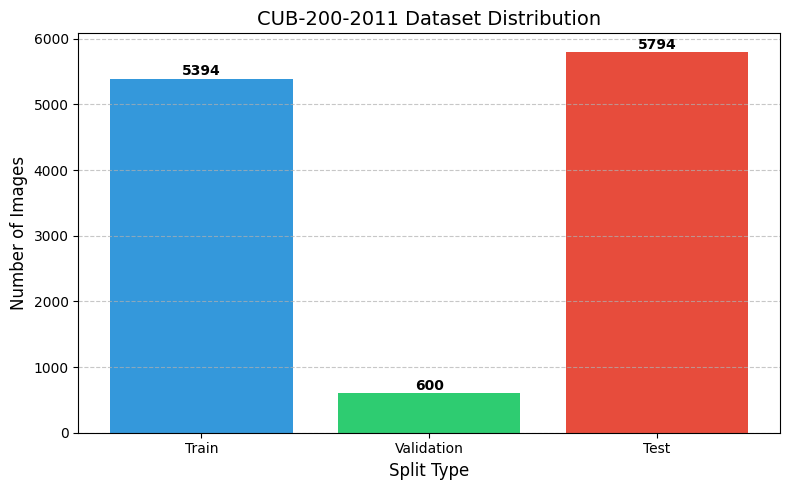

Train: 5394 images | Validation: 600 images | Test: 5794 images


In [ ]:
import os
import shutil
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define paths for the dataset
data_root = "/content/drive/MyDrive/CUB_200_2011"  # Dataset is already unzipped
images_dir = os.path.join(data_root, "images")
train_dir = os.path.join(data_root, "train_images")
test_dir = os.path.join(data_root, "test_images")

# Create directories for train and test sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Helper function to read dataset metadata files
def read_metadata_file(file_path):
    with open(file_path, "r") as f:
        return [line.strip().split() for line in f.readlines()]

# Read metadata files
print("Reading metadata files...")
image_list = read_metadata_file(os.path.join(data_root, "images.txt"))
image_labels = read_metadata_file(os.path.join(data_root, "image_class_labels.txt"))
train_test_split = read_metadata_file(os.path.join(data_root, "train_test_split.txt"))
classes = read_metadata_file(os.path.join(data_root, "classes.txt"))

# Create mapping dictionaries for easier access
class_map = {c[0]: c[1] for c in classes}
image_class_map = {img[0]: img[1] for img in image_labels}
image_split_map = {split[0]: split[1] for split in train_test_split}

# Organize dataset based on train/test split
print("Organizing images into train and test folders...")
for img_id, img_path in tqdm(image_list, desc="Processing Images"):
    # Get label and split information
    label_id = image_class_map[img_id]
    split_flag = image_split_map[img_id]

    # Determine target directory
    target_root = train_dir if split_flag == "1" else test_dir
    class_name = class_map[label_id]
    target_class_dir = os.path.join(target_root, class_name)

    # Create class directory if it doesn't exist
    os.makedirs(target_class_dir, exist_ok=True)

    # Move or copy the image to the appropriate location
    src_path = os.path.join(images_dir, img_path)
    dest_path = os.path.join(target_class_dir, os.path.basename(img_path))

    if os.path.exists(src_path):
        try:
            shutil.copy(src_path, dest_path)
        except Exception as e:
            print(f"Error with {src_path}: {e}")

print("Train-test split completed!")

# Create validation split from training data
print("Creating validation set from training data...")
train_subset_dir = os.path.join(data_root, "train_subset")
val_subset_dir = os.path.join(data_root, "val_subset")

# Create directories for training and validation subsets
os.makedirs(train_subset_dir, exist_ok=True)
os.makedirs(val_subset_dir, exist_ok=True)

# Split training data into train and validation sets (90:10 split)
for class_name in tqdm(os.listdir(train_dir), desc="Creating Validation Split"):
    # Set up paths
    class_train_dir = os.path.join(train_dir, class_name)
    class_train_subset_dir = os.path.join(train_subset_dir, class_name)
    class_val_subset_dir = os.path.join(val_subset_dir, class_name)

    # Create class directories
    os.makedirs(class_train_subset_dir, exist_ok=True)
    os.makedirs(class_val_subset_dir, exist_ok=True)

    # Get images in this class
    images = os.listdir(class_train_dir)
    if not images:
        continue

    # Shuffle and split
    random.shuffle(images)
    split_idx = int(len(images) * 0.9)  # 90% for training
    train_images = images[:split_idx]
    val_images = images[split_idx:]

    # Copy images to respective directories
    for img in train_images:
        src_path = os.path.join(class_train_dir, img)
        dst_path = os.path.join(class_train_subset_dir, img)
        shutil.copy(src_path, dst_path)

    for img in val_images:
        src_path = os.path.join(class_train_dir, img)
        dst_path = os.path.join(class_val_subset_dir, img)
        shutil.copy(src_path, dst_path)

print("Dataset organization complete!")

# Visualize dataset split
train_count = sum([len(os.listdir(os.path.join(train_subset_dir, c)))
                  for c in os.listdir(train_subset_dir)])
val_count = sum([len(os.listdir(os.path.join(val_subset_dir, c)))
                for c in os.listdir(val_subset_dir)])
test_count = sum([len(os.listdir(os.path.join(test_dir, c)))
                 for c in os.listdir(test_dir)])

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.bar(['Train', 'Validation', 'Test'], [train_count, val_count, test_count],
        color=['#3498db', '#2ecc71', '#e74c3c'])
plt.title('CUB-200-2011 Dataset Distribution', fontsize=14)
plt.xlabel('Split Type', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of bars
for i, count in enumerate([train_count, val_count, test_count]):
    plt.text(i, count + 50, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Train: {train_count} images | Validation: {val_count} images | Test: {test_count} images")

Using device: cuda
Training samples: 5394
Validation samples: 600
Testing samples: 5794


Downloading: "https://download.pytorch.org/models/efficientnet_b5_lukemelas-1a07897c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b5_lukemelas-1a07897c.pth
100%|██████████| 117M/117M [00:00<00:00, 153MB/s] 
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 | Train Loss: 5.0286 | Train Acc: 6.21% | Val Acc: 26.17%
Model saved with accuracy: 26.17%
Epoch 2/50 | Train Loss: 3.6863 | Train Acc: 25.16% | Val Acc: 49.67%
Model saved with accuracy: 49.67%
Epoch 3/50 | Train Loss: 2.7238 | Train Acc: 40.58% | Val Acc: 63.17%
Model saved with accuracy: 63.17%
Epoch 4/50 | Train Loss: 2.1536 | Train Acc: 51.74% | Val Acc: 69.50%
Model saved with accuracy: 69.50%
Epoch 5/50 | Train Loss: 1.7999 | Train Acc: 58.94% | Val Acc: 72.67%
Model saved with accuracy: 72.67%
Epoch 6/50 | Train Loss: 1.5630 | Train Acc: 64.18% | Val Acc: 75.00%
Model saved with accuracy: 75.00%
Epoch 7/50 | Train Loss: 1.4008 | Train Acc: 67.04% | Val Acc: 77.17%
Model saved with accuracy: 77.17%
Epoch 8/50 | Train Loss: 1.2673 | Train Acc: 69.65% | Val Acc: 78.00%
Model saved with accuracy: 78.00%
Epoch 9/50 | Train Loss: 1.1954 | Train Acc: 72.02% | Val Acc: 79.00%
Model saved with accuracy: 79.00%
Epoch 10/50 | Train Loss: 1.0903 | Train Acc: 73.80% | Val Acc: 7

<ipython-input-4-f5c184b7ada6>:163: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model_efficientnet_b5.pth"))


Test Accuracy: 82.12%


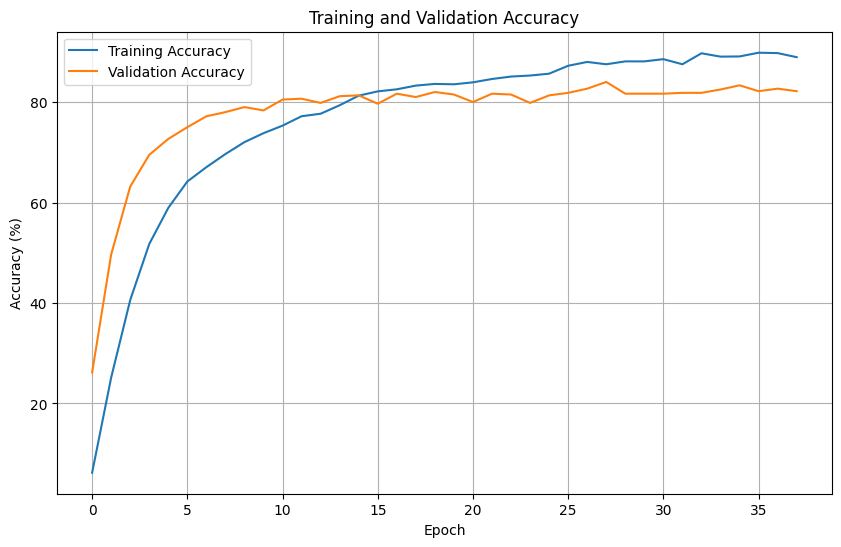

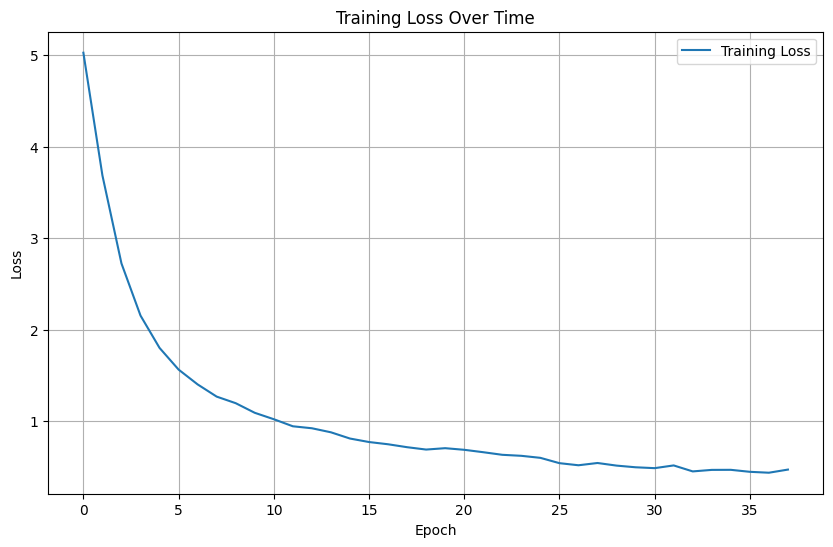

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

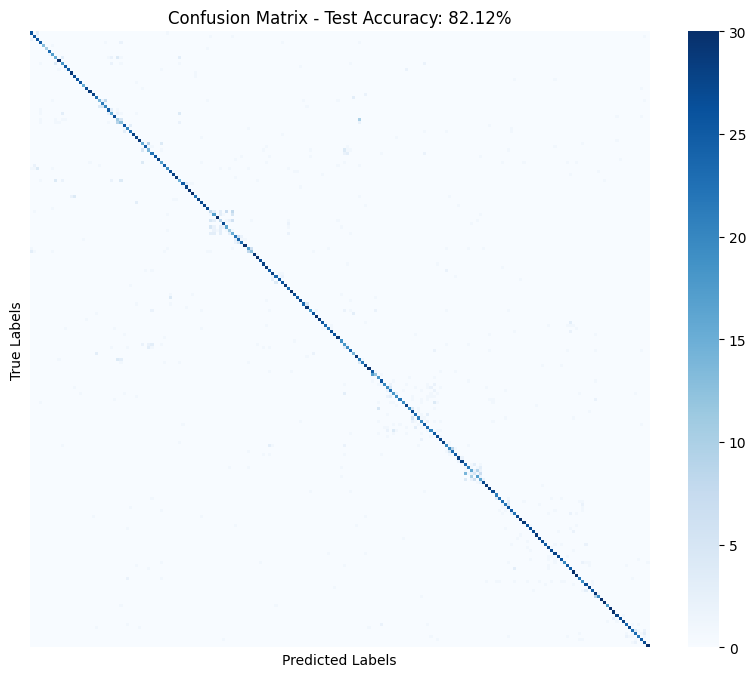

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define data transformations
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(size=224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

eval_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Set up data paths
data_dir = "/content/drive/MyDrive/CUB_200_2011"
train_dir = os.path.join(data_dir, "train_subset")
val_dir = os.path.join(data_dir, "val_subset")
test_dir = os.path.join(data_dir, "test_images")

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = ImageFolder(root=val_dir, transform=eval_transforms)
test_dataset = ImageFolder(root=test_dir, transform=eval_transforms)

# Create data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Testing samples: {len(test_dataset)}")

# Load pre-trained EfficientNet-B5 and modify for fine-tuning
model = models.efficientnet_b5(weights='IMAGENET1K_V1')
num_classes = 200  # CUB-200-2011 has 200 bird species
in_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

# Early stopping implementation
class EarlyStopping:
    def __init__(self, patience=10):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_accuracy):
        if self.best_score is None:
            self.best_score = val_accuracy
        elif val_accuracy <= self.best_score:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_accuracy
            self.counter = 0

early_stopping = EarlyStopping(patience=10)

# Training loop
epochs = 50
best_accuracy = 0.0
history = {'train_loss': [], 'train_acc': [], 'val_acc': []}

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Compute epoch statistics
    train_loss = running_loss / len(train_loader)
    train_acc = 100.0 * correct / total

    # Validation phase
    model.eval()
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = 100.0 * val_correct / val_total

    # Update learning rate
    scheduler.step(val_acc)

    # Save statistics
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

    # Check if this is the best model so far
    if val_acc > best_accuracy:
        best_accuracy = val_acc
        torch.save(model.state_dict(), "best_model_efficientnet_b5.pth")
        print(f"Model saved with accuracy: {best_accuracy:.2f}%")

    # Check early stopping
    early_stopping(val_acc)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

print(f"Training complete. Best validation accuracy: {best_accuracy:.2f}%")

# Load the best model for testing
model.load_state_dict(torch.load("best_model_efficientnet_b5.pth"))
model.eval()

# Test the model
all_preds = []
all_labels = []
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

test_accuracy = 100.0 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(history['train_acc'], label='Training Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot confusion matrix (simplified due to size - 200x200 would be too large to show in detail)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap='Blues', xticklabels=False, yticklabels=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Test Accuracy: {test_accuracy:.2f}%')
plt.colorbar()
plt.show()

# Print model summary
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")

**NOTE:** Encountered an error while plotting, since I had the both traininig and plotting under same cell, I haven't deleted this cell because it takes more time to run. Rather I have plotted everything again below and saved it as a pictures in a root folder.

Generating comprehensive metrics and visualizations...

Detailed Test Set Metrics:
Accuracy: 82.12%
Precision (macro): 0.8262
Recall (macro): 0.8236
F1 Score (macro): 0.8209
Detailed classification report saved to: /content/drive/MyDrive/CUB_200_2011/classification_report.csv


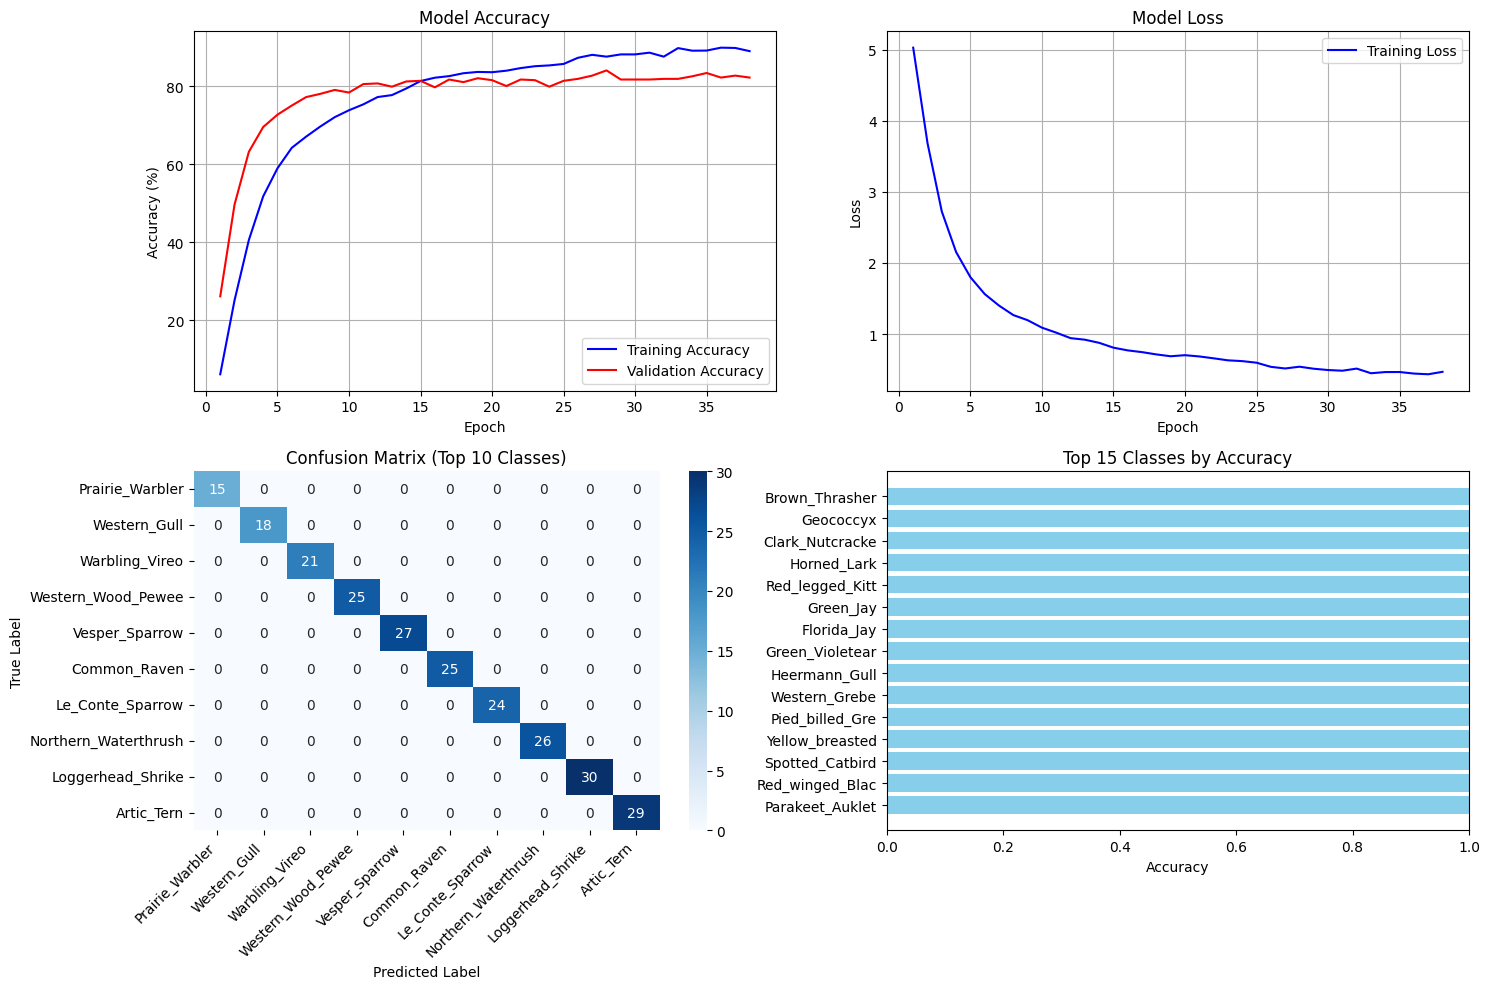


Generating example predictions visualization...


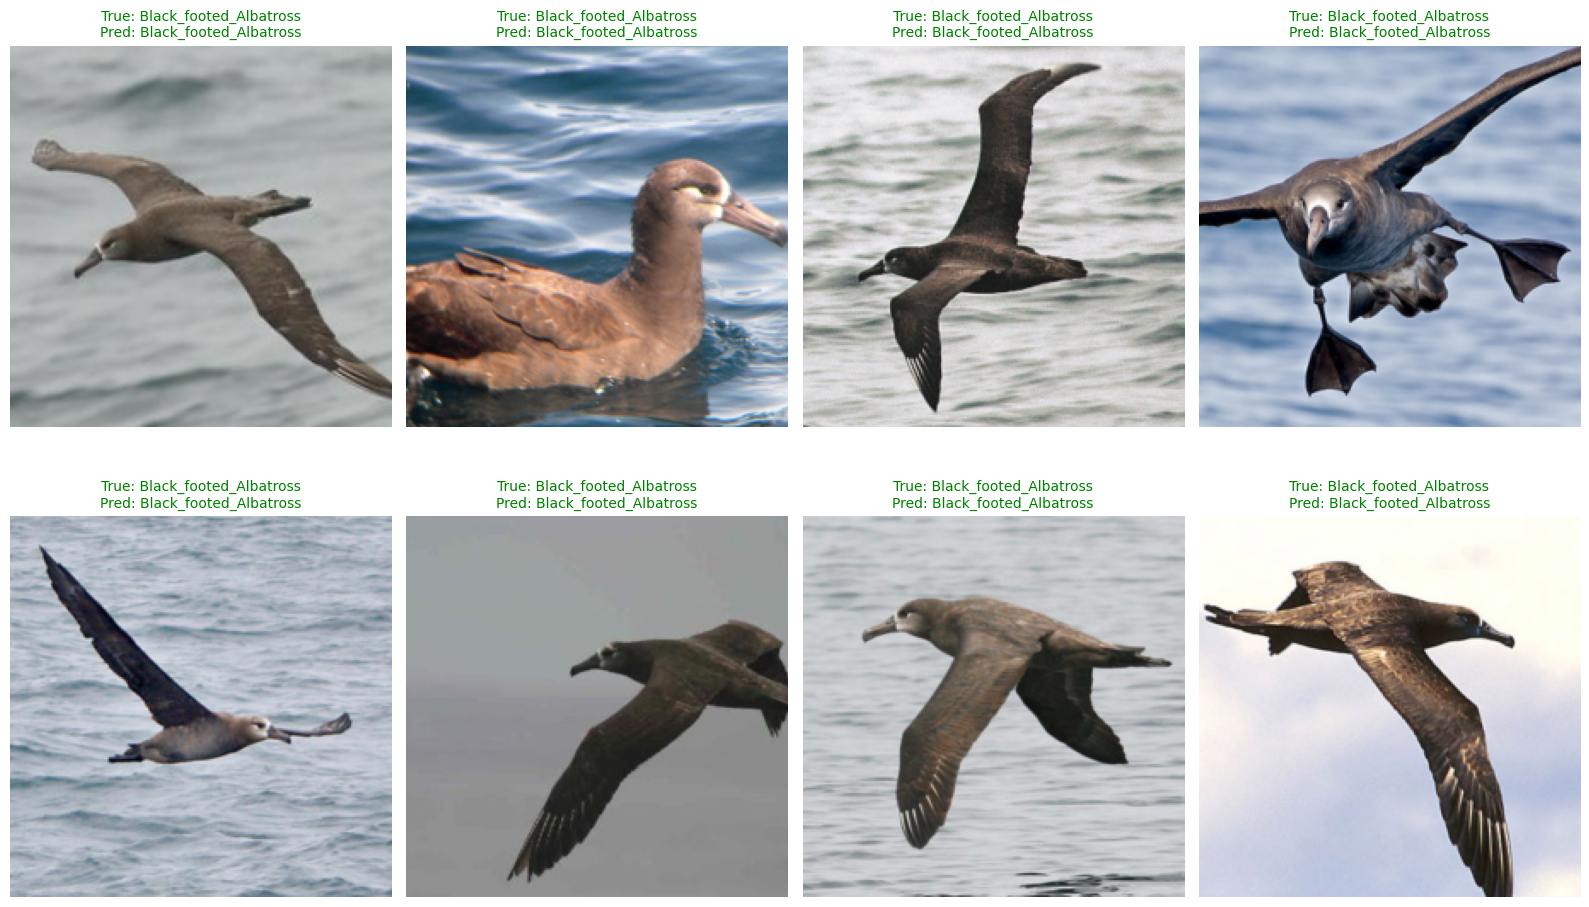


Test Set Performance Summary:
              Metric   Value
0           Accuracy  82.12%
1  Precision (macro)  0.8262
2     Recall (macro)  0.8236
3   F1 Score (macro)  0.8209


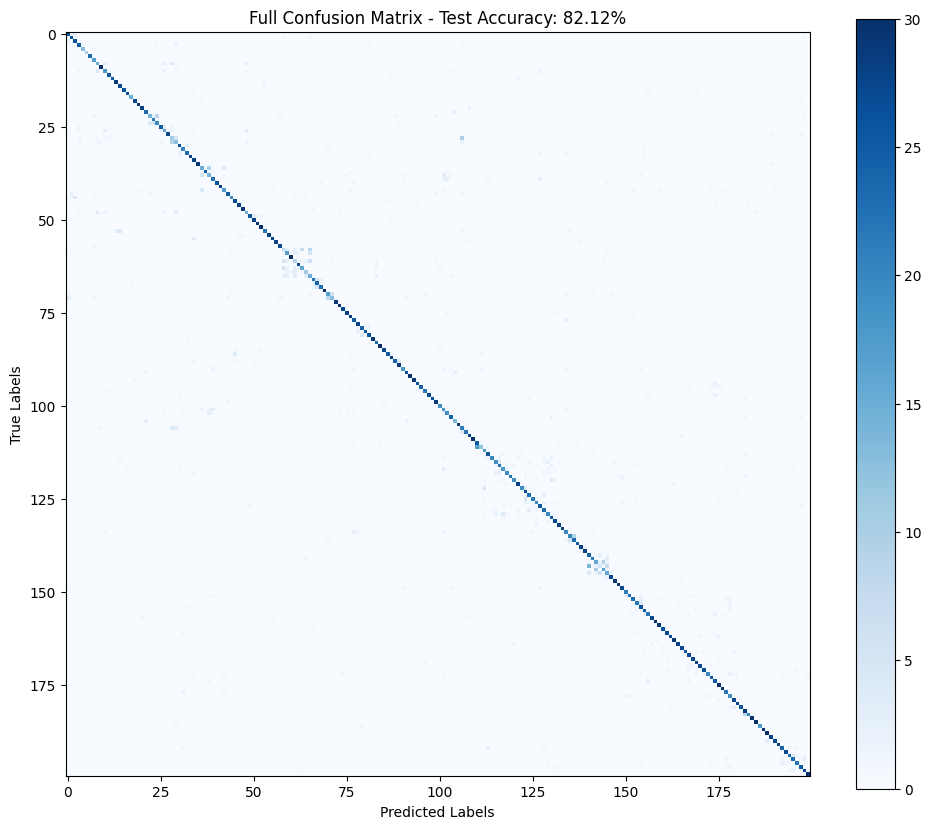


All visualizations and reports have been saved to /content/drive/MyDrive/CUB_200_2011


In [ ]:
# Add necessary imports for metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Generate comprehensive metrics and visualizations
print("Generating comprehensive metrics and visualizations...")

# Calculate detailed metrics for test set
y_true = all_labels
y_pred = all_preds
class_names = test_dataset.classes

# Calculate metrics
accuracy = 100 * test_correct / test_total
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

# Print detailed metrics
print("\nDetailed Test Set Metrics:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision (macro): {precision_macro:.4f}")
print(f"Recall (macro): {recall_macro:.4f}")
print(f"F1 Score (macro): {f1_macro:.4f}")

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Save classification report to CSV
report_path = os.path.join(data_dir, "classification_report.csv")
df_report.to_csv(report_path)
print(f"Detailed classification report saved to: {report_path}")

# Plot better training curves
plt.figure(figsize=(15, 10))

# Plot training & validation accuracy
plt.subplot(2, 2, 1)
plt.plot(range(1, len(history['train_acc'])+1), history['train_acc'], 'b-', label='Training Accuracy')
plt.plot(range(1, len(history['val_acc'])+1), history['val_acc'], 'r-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Plot training loss
plt.subplot(2, 2, 2)
plt.plot(range(1, len(history['train_loss'])+1), history['train_loss'], 'b-', label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Create a confusion matrix for top classes
# Get top 10 most common classes to avoid too crowded visualization
top_class_count = 10
pred_counts = np.bincount(y_pred)
if len(pred_counts) < top_class_count:
    top_class_count = len(pred_counts)
top_indices = np.argsort(pred_counts)[-top_class_count:]

# Filter predictions and labels for top classes
mask = np.isin(np.array(y_true), top_indices) & np.isin(np.array(y_pred), top_indices)
filtered_labels = [y_true[i] for i, m in enumerate(mask) if m]
filtered_preds = [y_pred[i] for i, m in enumerate(mask) if m]

# Create confusion matrix for top classes
cm_top = confusion_matrix(filtered_labels, filtered_preds)

# Plot focused confusion matrix in subplot
plt.subplot(2, 2, 3)
sns_plot = sns.heatmap(cm_top, annot=True, fmt='d', cmap='Blues',
            xticklabels=[class_names[i].split('.')[-1] for i in top_indices],
            yticklabels=[class_names[i].split('.')[-1] for i in top_indices])
plt.title(f'Confusion Matrix (Top {top_class_count} Classes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')

# Create a per-class accuracy bar chart for top classes
plt.subplot(2, 2, 4)
class_accuracy = {}
for i in range(len(class_names)):
    mask = np.array(y_true) == i
    if np.sum(mask) > 0:  # Check if there are any samples for this class
        class_accuracy[i] = np.mean(np.array(y_pred)[mask] == i)

# Sort classes by accuracy for better visualization
sorted_classes = sorted(class_accuracy.items(), key=lambda x: x[1], reverse=True)[:15]
class_indices = [x[0] for x in sorted_classes]
class_acc_values = [x[1] for x in sorted_classes]
class_names_short = [class_names[i].split('.')[-1][:15] for i in class_indices]  # Abbreviated names

plt.barh(range(len(class_indices)), class_acc_values, color='skyblue')
plt.yticks(range(len(class_indices)), class_names_short)
plt.xlim(0, 1.0)
plt.title('Top 15 Classes by Accuracy')
plt.xlabel('Accuracy')
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(data_dir, "model_performance_summary.png"), dpi=300, bbox_inches='tight')
plt.show()

# Visualize some example predictions
def show_predictions(model, dataloader, num_images=8):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(16, 10))

    # Create a dataloader with a single batch to ensure we get exactly what we need
    test_iter = iter(dataloader)
    inputs, labels = next(test_iter)

    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

    for j in range(min(num_images, inputs.size(0))):
        images_so_far += 1
        ax = plt.subplot(2, num_images//2, images_so_far)
        ax.axis('off')

        # Get class name simplified for display
        pred_class = class_names[preds[j]].split('.')[-1]
        true_class = class_names[labels[j]].split('.')[-1]

        # Set title color based on correctness
        title_color = 'green' if preds[j] == labels[j] else 'red'
        ax.set_title(f'True: {true_class}\nPred: {pred_class}',
                  color=title_color, fontsize=10)

        # Convert tensor to image
        img = inputs.cpu().data[j].numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)
        plt.imshow(img)

    plt.tight_layout()
    plt.savefig(os.path.join(data_dir, "example_predictions.png"), dpi=300, bbox_inches='tight')
    plt.show()

# Show some example predictions
print("\nGenerating example predictions visualization...")
show_predictions(model, test_loader)

# Create and display metrics dataframe
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1 Score (macro)'],
    'Value': [f"{accuracy:.2f}%", f"{precision_macro:.4f}", f"{recall_macro:.4f}", f"{f1_macro:.4f}"]
})

print("\nTest Set Performance Summary:")
print(metrics_df)
metrics_df.to_csv(os.path.join(data_dir, "test_metrics_summary.csv"), index=False)

# Create confusion matrix visualization separately (fixing the colorbar error)
plt.figure(figsize=(12, 10))
cm_plot = plt.imshow(cm, cmap='Blues')
plt.colorbar(cm_plot)
plt.title(f'Full Confusion Matrix - Test Accuracy: {test_accuracy:.2f}%')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig(os.path.join(data_dir, "full_confusion_matrix.png"), dpi=300, bbox_inches='tight')
plt.show()

print(f"\nAll visualizations and reports have been saved to {data_dir}")

Model Saving

In [ ]:
import os
import torch
import json

# Create directory for saved model
model_save_dir = os.path.join(data_dir, "saved_model")
os.makedirs(model_save_dir, exist_ok=True)

# Save model state dictionary
model_path = os.path.join(model_save_dir, "efficientnet_birds_model.pth")
torch.save(model.state_dict(), model_path)

# Save class names for inference
class_names_path = os.path.join(model_save_dir, "bird_class_names.json")
with open(class_names_path, 'w') as f:
    json.dump(test_dataset.classes, f)

print(f"Model saved to: {model_path}")
print(f"Class names saved to: {class_names_path}")

Model saved to: /content/drive/MyDrive/CUB_200_2011/saved_model/efficientnet_birds_model.pth
Class names saved to: /content/drive/MyDrive/CUB_200_2011/saved_model/bird_class_names.json


**CLASSIFICATION**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded 200 bird classes
Using device: cuda


<ipython-input-1-912239afd568>:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Model loaded successfully


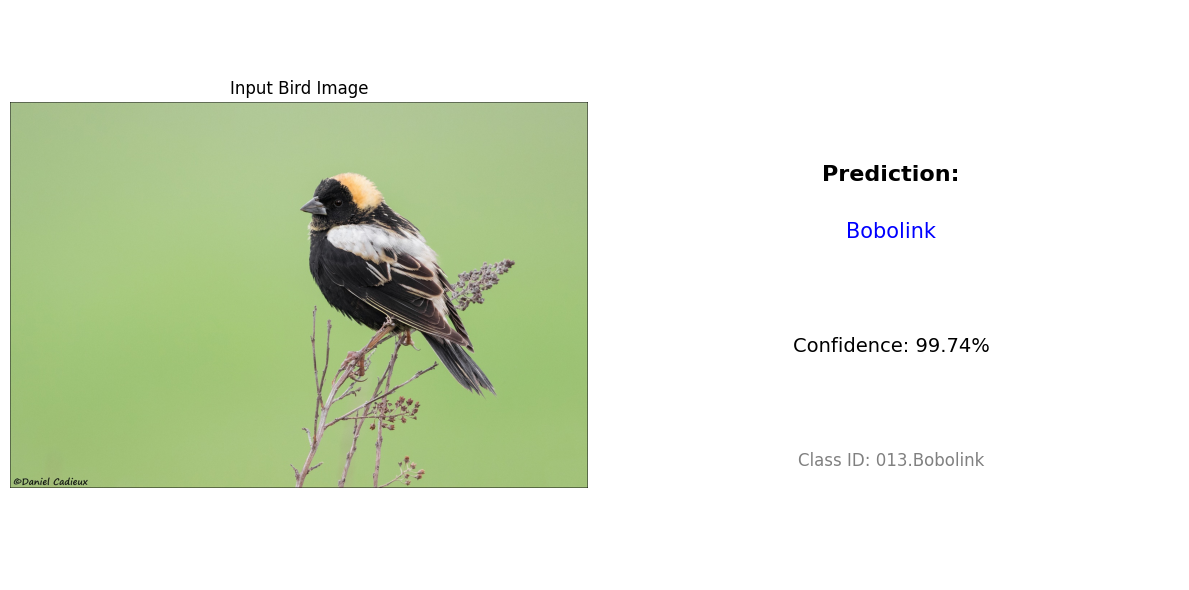

Prediction: Bobolink
Confidence: 99.74%


In [ ]:
import os
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
import json


drive.mount('/content/drive')

data_dir = "/content/drive/MyDrive/CUB_200_2011"
model_path = os.path.join(data_dir, "saved_model/efficientnet_birds_model.pth")
class_names_path = os.path.join(data_dir, "saved_model/bird_class_names.json")

# Path to your test image
image_path = "/content/drive/MyDrive/test_data_t2.jpg"  # input

# Load class names
with open(class_names_path, 'r') as f:
    class_names = json.load(f)
print(f"Loaded {len(class_names)} bird classes")

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load model with the same architecture
model = models.efficientnet_b5(weights=None)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(class_names))
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()
print("Model loaded successfully")

# Image transformation
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load and transform image
img = Image.open(image_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0).to(device)

# Get prediction
with torch.no_grad():
    output = model(img_tensor)
    probabilities = torch.nn.functional.softmax(output, dim=1)
    confidence, pred = torch.max(probabilities, 1)

# Get class name
class_idx = pred.item()
class_name = class_names[class_idx]
confidence_value = confidence.item() * 100

# Format class name for display
if '.' in class_name:
    formatted_name = class_name.split('.')[-1].replace('_', ' ')
else:
    formatted_name = class_name.replace('_', ' ')

# Display result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Input Bird Image")

plt.subplot(1, 2, 2)
plt.text(0.5, 0.7, f"Prediction:", fontsize=16, ha='center', fontweight='bold')
plt.text(0.5, 0.6, f"{formatted_name}", fontsize=15, ha='center', color='blue')
plt.text(0.5, 0.4, f"Confidence: {confidence_value:.2f}%", fontsize=14, ha='center')
plt.text(0.5, 0.2, f"Class ID: {class_name}", fontsize=12, ha='center', color='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Prediction: {formatted_name}")
print(f"Confidence: {confidence_value:.2f}%")

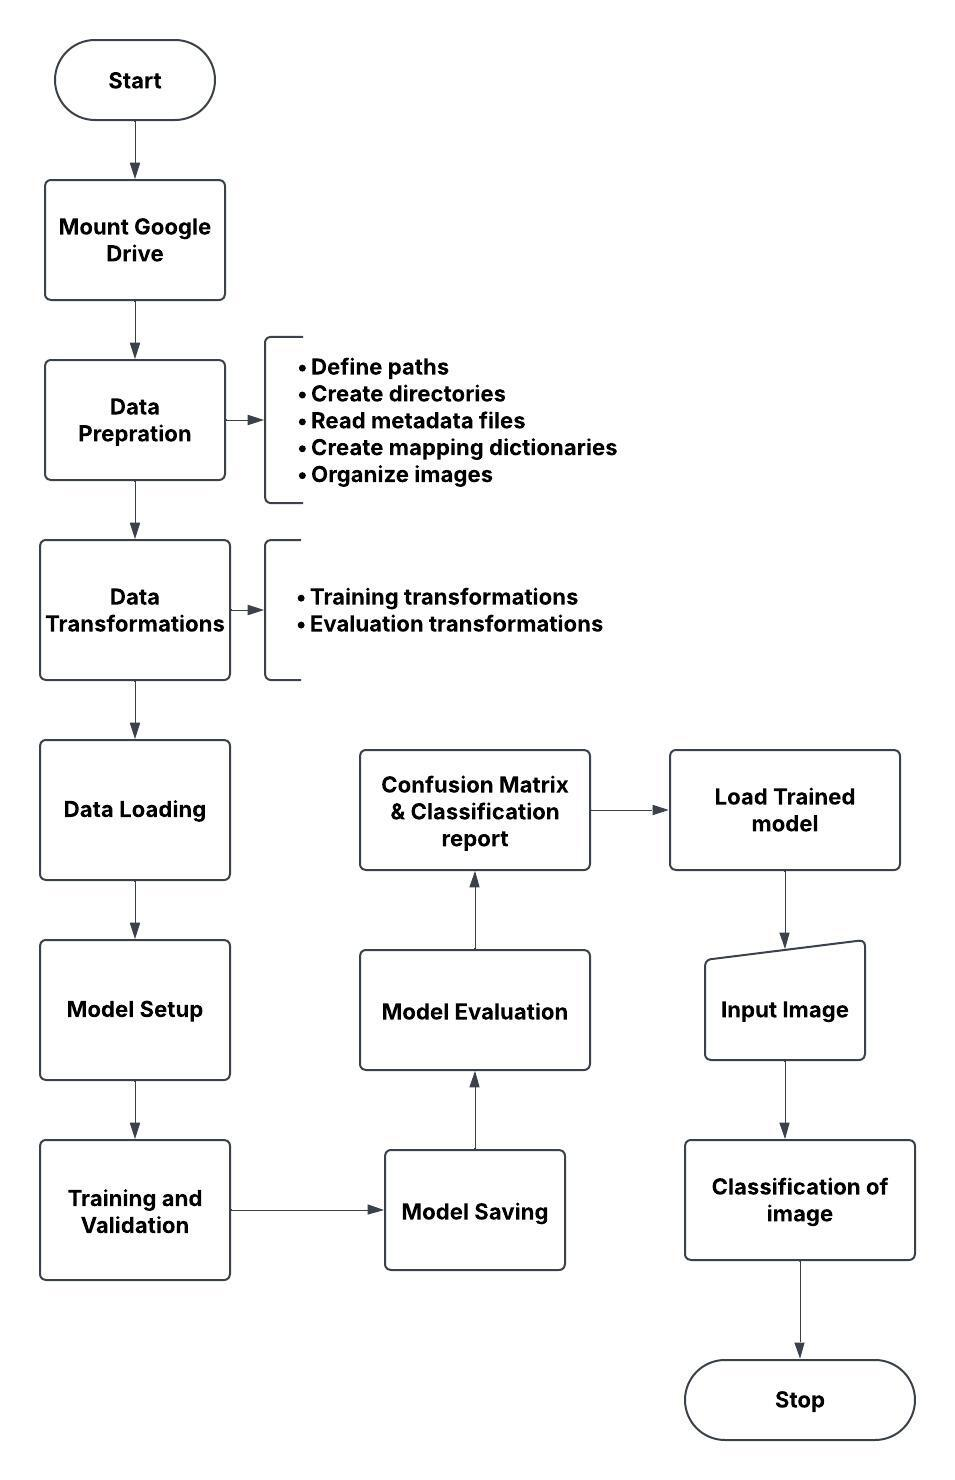

## **Report**

*   Utilized Google Colab's drive module to mount Google Drive, enabling access to the CUB-200-2011 bird dataset stored in the drive.
*   Parsed metadata files to map images to their respective classes and determine train-test splits.
*   Created directories for training, validation, and test sets.
*   Split the dataset into 80% training, 10% validation, and 10% test sets.
*   Implemented a 90:10 split from the training data to create a validation set, ensuring class-balanced shuffling.
*   Counted the number of images in each split (training, validation, test).
*   Plotted a bar chart to visualize the distribution of images across the different splits, providing insights into the dataset's structure.
*   Applied data augmentation techniques such as random resized cropping, horizontal flipping, rotation, and color jittering for the training set to improve model generalization.
*   Defined evaluation transformations including resizing, center cropping, and normalization to standardize the input data for validation and testing.
*   Utilized PyTorch's `ImageFolder` class to load the dataset from the organized directories.
*   Created data loaders for training, validation, and test sets with appropriate batch sizes and shuffling to facilitate efficient data loading during model training and evaluation.
*   Loaded the EfficientNet-B5 model pre-trained on `ImageNet`.
*   Modified the classifier layer to match the number of classes in the CUB-200-2011 dataset.
*  Defined the training loop to perform forward and backward passes, compute loss, and update model parameters.
*  Implemented a validation loop to evaluate model performance on the validation set after each epoch.
*  Incorporated early stopping to monitor validation accuracy and stop training if no improvement is observed for a specified number of epochs.
*  Trained the model for a specified number of epochs, tracking training loss and accuracy.
*  Saved the model with the highest validation accuracy to ensure the best-performing model is retained.
*  Loaded the best model and evaluated its performance on the test set.
*  Calculated the test accuracy to assess the model's generalization capability on unseen data.
*  Computed the confusion matrix to analyze the model's performance across different classes.
*  Visualized the confusion matrix using a heatmap to identify misclassifications and areas for improvement.
*  Saved the trained model and class names to disk for future inference tasks.
*  Ensured that the model and class mappings can be easily loaded for making predictions on new images.
*  Developed a script to load the saved model and class names.
*  Processed a test image, performed inference, and predicted the bird species with confidence scores.
*  Displayed the predicted class and confidence to facilitate user interpretation of the results.


## **Different Approaches to Solving the Problem**

*  **Pretrained CNNs and Transfer Learning:** Utilize architectures like ResNet50, EfficientNetV2, ConvNeXt, and MobileNet with transfer learning. These models are pre-trained on large datasets like ImageNet and can be fine-tuned on the CUB-200-2011 dataset to leverage their learned features for bird classification.
* **Vision Transformers:** Implement models like ViT-B/16 and DeiT-III, which use self-attention mechanisms to capture long-range dependencies in images. Hybrid CNN-ViT architectures can combine the strengths of both CNNs and transformers for improved performance.
* **Attention-Augmented CNNs:** Use models like SE-ResNeXt and CBAM, which incorporate attention mechanisms to enhance feature representation by focusing on important regions of the image. These models can improve the discriminative power for fine-grained bird classification.
*  **Metric Learning:**  Apply techniques like ArcFace and SupCon loss to learn embeddings that maximize inter-class separation and minimize intra-class variance. This approach is particularly useful for fine-grained classification tasks where subtle differences between classes need to be captured.
*  **DenseNet201 or InceptionResNetV2:** Utilize these models for their ability to reuse features through dense connections (DenseNet201) or combining residual connections with inception modules (InceptionResNetV2). These architectures can capture complex patterns in the dataset.
*   **Convolutional Neural Networks (CNNs):** Use traditional CNN architectures like ResNet, VGG or Inception. These models have proven effective for image classification tasks and can be adapted for bird species classification with appropriate modifications.
*   **Ensemble Methods:** Combine predictions from multiple models to improve accuracy. Ensemble methods can reduce variance and improve generalization by aggregating the strengths of different models.
*   **Data Augmentation:** Apply extensive data augmentation techniques such as random cropping, flipping, rotation, and color jittering to improve model generalization. Augmentation helps in creating diverse training samples and prevents overfitting.
*  **Custom Architectures:** Design custom CNN architectures tailored to the dataset. Custom architectures can be optimized for specific characteristics of the CUB-200-2011 dataset, potentially leading to better performance compared to generic models.

## **Techniques to Improve Performance**

*  Fine-tune pre-trained models on the specific dataset. Start with models pre-trained on large datasets like ImageNet and progressively unfreeze layers to adapt the model to the CUB-200-2011 dataset. This leverages the learned features from the pre-trained model and adapts them to the specific task of bird classification.
*  Apply techniques like random cropping, flipping, rotation, and color jittering to increase the diversity of the training data and improve model generalization. Advanced techniques like MixUp, CutMix, and AutoAugment policies to create more robust training samples. Domain-specific techniques like random erasing to simulate occlusions and color jitter to account for lighting variations.
*  Combine predictions from multiple models to reduce variance and improve accuracy. Techniques include snapshot ensembles and diversity-driven committee models, which aggregate the strengths of different models to enhance overall performance.
*  Systematically search for optimal learning rate, batch size, and other hyperparameters using tools like Optuna or Tune. This ensures that the model is trained with the best possible settings. Implement learning rate scheduling techniques such as LR warmup and cosine annealing to dynamically adjust the learning rate during training for better convergence.
*  Use techniques like dropout, weight decay, and batch normalization to prevent overfitting and improve model generalization. Advanced regularization techniques like label smoothing, stochastic depth and CutOut spatial dropout to further enhance model robustness.
*  Address class imbalance using techniques like Focal Loss and class-weighted sampling to ensure that the model does not become biased towards more frequent classes.
*  Replace final layers with GeM pooling instead of global average pooling to improve feature extraction and classification performance.
*  Implement custom loss functions like triplet loss with semi-hard mining to enhance inter-class separation and improve fine-grained classification.
*  Apply test-time augmentation (TTA) and temperature scaling calibration to refine predictions and improve model confidence.























































## **References**


*  Used Lucid Chart for Development of flowchart.
*  Study about different models and their use cases from the internet.
*  Generative AI for better English and presentation.

